#### Why regression?

Figure out the slope and intercept - to create a model that best fits the data

#### Example use case
Forecast stock price

In [326]:
import pandas as pd
import quandl, datetime
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [327]:
df =  quandl.get('WIKI/GOOGL')

In [328]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.150,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.550,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [329]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [330]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


- Volatility - High & Low
- Open change - Open & Close

In [331]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1778334706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1778334706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


In [332]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [333]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.976619,0.130884,1990515.0
2018-03-22,1053.150000,3.265882,-2.487014,3418154.0
2018-03-23,1026.550000,4.089299,-2.360729,2413517.0


### Features & Labels
#### Time to think of which columns are features and which are labels - What do I use to predict and what am I predicting?
- Label - Adj. Close
- Features - HL_PCT, PCT_change, Adj. Volume

You won't know the PCT_change until the close price is there. Sentdex: If you trained a model to predict the PCT_change then it would be a biased model??

In [334]:
forecast_col = 'Adj. Close'

# Dealing with na data - treated as an outlier
df.fillna(-99999, inplace=True)

# Foreacast horizon - Predict 10% of the data in the future
forecast_out = int(math.ceil(0.01*len(df)))

# Create label column
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1145965115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(-99999, inplace=True)
C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1145965115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[forecast_col].shift(-forecast_out)
C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1145965115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [335]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,1.142604,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,1.213207,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,1.547000,0.476195,2774967.0,1026.550000


### Training and Testing
#### Define features, X and labels, y

In [336]:
# Define X and y
X = np.array(df.drop(['label'], axis=1))
y = np.array(df['label'])

X = preprocessing.scale(X)
y = np.array(df['label'])

print('X Rows:', len(X), '\nY Rows:', len(y))

X Rows: 3389 
Y Rows: 3389


In [337]:
# Cross-validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [338]:
# Initialize model
reg = LinearRegression(n_jobs=10)

# Train
reg.fit(X_train, y_train)

# Test
accuracy_reg = reg.score(X_test, y_test)

In [339]:
# R2
print(accuracy)

0.9789635772057095


In [340]:
# Use SVM
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy_svm = clf.score(X_test, y_test)
print(accuracy_svm)

0.7726613896082863


#### Forecasting and Predicting

In [341]:
# Remove label for X
X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]

# Only the label is needed for y
y = np.array(df['label'])

In [342]:
print('X Shape:', X.shape, '\ny Shape:', y.shape)

X Shape: (3389, 4) 
y Shape: (3389,)


In [349]:
# Cross-validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Initialize model
reg = LinearRegression(n_jobs=-1)

# Train
reg.fit(X_train, y_train)

# Test
accuracy_reg = reg.score(X_test, y_test)

# Forecast
forecast_set = reg.predict(X_forecast)
print('Forecasted data:', forecast_set, '\nAccuracy:', accuracy_reg, '\nForecast horizon:', forecast_out)

Forecasted data: [1078.98307916 1093.31107207 1106.82804533 1101.57988225 1095.13583602
 1093.04549798 1091.77248992 1087.88072498 1082.07178993 1077.57853827
 1075.86581685 1094.2438964  1112.77028987 1118.18864401 1132.84762104
 1137.11427358 1135.24670784 1133.0609502  1134.7551693  1152.35339377
 1151.74310303 1161.44581205 1158.07686522 1166.51457655 1186.21420825
 1199.50930565 1193.08544595 1205.32180683 1209.89404972 1209.52816432
 1200.33104617 1205.14301534 1203.99264881 1139.43891431 1083.21061217] 
Accuracy: 0.9765285136579229 
Forecast horizon: 35


In [344]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,1.142604,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,1.213207,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,1.547000,0.476195,2774967.0,1026.550000


#### Visualize

C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1207066627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1207066627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\Amirah\AppData\Local\Temp\ipykernel_864\1207066627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

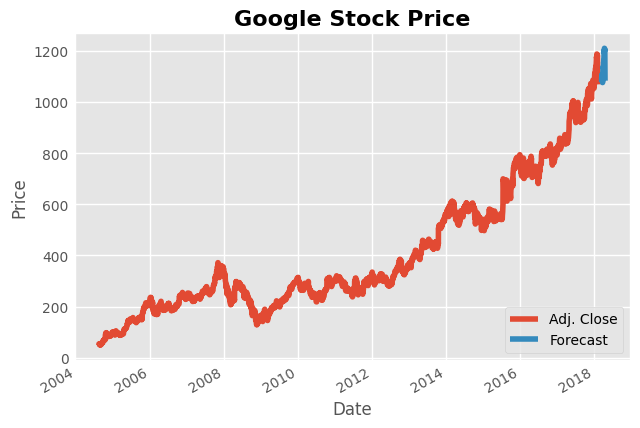

In [350]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
# plt.plot(df['Date'], df['Adj. Close'])
# plt.plot(df['Date'], df['Forecast'])

style.use('ggplot')

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.title("Google Stock Price", fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [224]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19 00:00:00,50.322842,8.441017,0.324968,44659000.0,69.078238,NaN
2004-08-20 00:00:00,54.322689,8.537313,7.227007,22834300.0,67.839414,NaN
2004-08-23 00:00:00,54.869377,4.062357,-1.227880,18256100.0,68.912727,NaN
2004-08-24 00:00:00,52.597363,7.753210,-5.726357,15247300.0,70.668146,NaN
2004-08-25 00:00:00,53.164113,3.966115,1.183658,9188600.0,71.219849,NaN
...,...,...,...,...,...,...
2018-03-08 08:00:00,NaN,NaN,NaN,NaN,NaN,1197.242212
2018-03-09 08:00:00,NaN,NaN,NaN,NaN,NaN,1202.046015
2018-03-10 08:00:00,NaN,NaN,NaN,NaN,NaN,1201.056629


### Pickling & Scaling

#### Save the model

#### Scaling model using cloud servers

In [225]:
import pickle

with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(reg, f)

In [226]:
# Create instance of model
model_file = open('LinearRegression.pickle', 'rb')
model = pickle.load(model_file)


In [227]:
# Forecast using saved model
model.predict(X_forecast)

array([1076.35386769, 1090.71706753, 1104.30998302, 1098.76890145,
       1092.25597378, 1090.13045545, 1088.83067649, 1085.0781177 ,
       1079.20093789, 1074.76788755, 1072.97111311, 1092.17981803,
       1110.57394339, 1115.28506187, 1130.09139596, 1134.22741326,
       1132.21711158, 1130.18395607, 1131.79045872, 1150.06053174,
       1148.86168837, 1158.62808491, 1155.1652962 , 1163.61275941,
       1183.85760879, 1196.47604926, 1189.93312385, 1202.26593706,
       1206.92072534, 1206.41550922, 1197.24221159, 1202.04601457,
       1201.05662876, 1136.34993943, 1080.98531047])

#### Regression - Ground up

We'll figure out the best fit line by regressing variables to solve for the slope and intercept

In [238]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

def slope(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)**2) - mean(x*x)))
    return m

def intercept(x,y):
    b = mean(y) - slope(x,y)*mean(x)
    return b

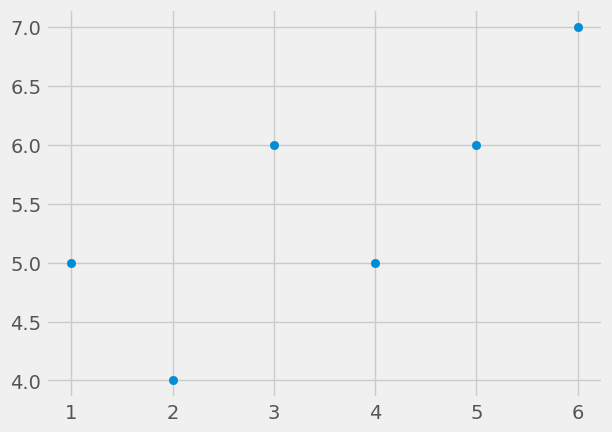

In [263]:
x = np.array([1,2,3,4,5,6], dtype=np.float64)
y = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.scatter(x,y)

In [264]:
m = slope(x,y)
b = intercept(x,y)

print("Slope:", m , "\nIntercept:",b)

Slope: 0.42857142857142866 
Intercept: 4.0


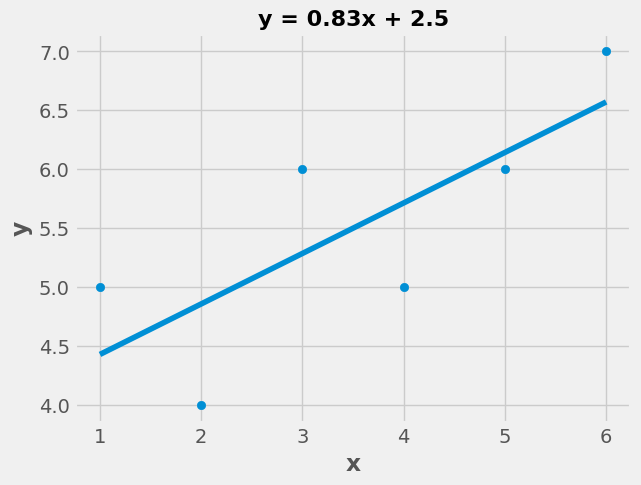

In [265]:
regression_line = [(m*x)+b for x in x]

style.use('fivethirtyeight')
plt.scatter(x,y)
plt.plot(x, regression_line)
plt.title('y = 0.83x + 2.5', fontsize=16, fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()

#### R-Squared - How good of a fit is your line (coefficient of determination)

In [266]:
def rsquare(y_original, regression_line):
    r_square = 1 - ((y_original - regression_line)**2).sum() / ((y_original - y.mean())**2).sum()
    return r_square

In [267]:
rsquare(y, regression_line)

np.float64(0.5844155844155845)

#### Testing assumptions

In [272]:
import random

def create_dataset(datapoints, variance, step_size=2, correlation=False):
    val = 1
    y = []
    for i in range(datapoints):
        y.append(val + random.randrange(-variance, variance))
        if correlation and correlation == 'pos':
            val += step_size
        elif correlation and correlation == 'neg':
            val -= step_size
    
    x = [i for i in range(datapoints)]
    
    return np.array(x, dtype=np.float64), np.array(y, dtype=np.float64)

Slope: 1.9871482176360218 
Intercept: -0.17439024390242253
R-Squared: 0.9775115443932052


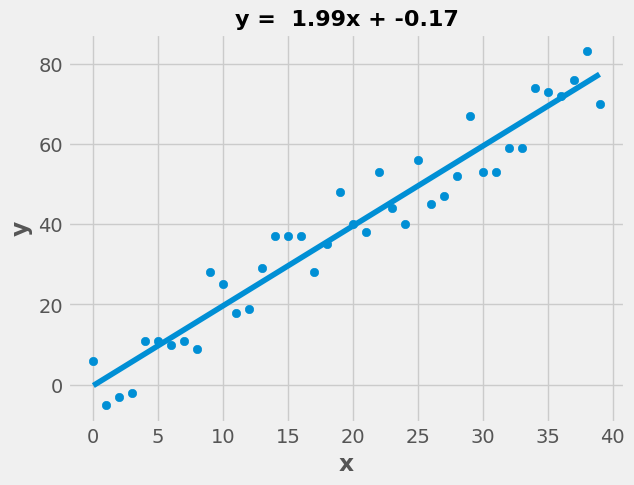

In [294]:
xs, ys = create_dataset(datapoints=40, variance=10, step_size=2, correlation='pos')

m = slope(xs,ys)
b = intercept(xs,ys)

print("Slope:", m , "\nIntercept:",b)

regression_line = [(m*x)+b for x in xs]

print("R-Squared:", rsquare(ys, regression_line))
eq_line = f"y = {m: .2f}x + {b: .2f}"

style.use('fivethirtyeight')
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.title(eq_line, fontsize=16, fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()